# Clasificación Binaria con el Dataset Titanic

Mario Yahir García Hernández

Oscar Correa Saenz

Ricardo Aguilar Pérez

# Librerías:


In [ ]:
# Importar las librerías necesarias para el análisis y modelado

# Seaborn: Librería para la visualización de datos estadísticos. Aquí se usa para cargar un dataset de ejemplo (Titanic).
import seaborn as sns

# Pandas: Librería esencial para la manipulación y análisis de datos. Nos permite cargar, procesar y analizar datos en formato tabular (DataFrames).
import pandas as pd

# Numpy: Biblioteca para realizar cálculos numéricos eficientes con arreglos y matrices multidimensionales. Ayuda con operaciones matemáticas de los datos.
import numpy as np

# Scikit-learn: Librería de machine learning. Aquí se usa para dividir los datos en entrenamiento y prueba, escalar los datos, codificar etiquetas y medir el rendimiento del modelo.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc

# Matplotlib: Librería de visualización para gráficos en 2D. Se usa para graficar la curva ROC.
import matplotlib.pyplot as plt

# TensorFlow y Keras: Librería de deep learning que se usa para crear y entrenar redes neuronales. Keras es la API de alto nivel de TensorFlow.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Cargar el dataset Titanic
titanic = sns.load_dataset('titanic')




# Preprocesamiento de datos:


In [ ]:
# Eliminar columnas irrelevantes y con muchos valores nulos
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive'])

# Eliminar filas con valores nulos
titanic = titanic.dropna()

# Convertir variables categóricas a numéricas
le = LabelEncoder()
titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])
titanic['class'] = le.fit_transform(titanic['class'])
titanic['who'] = le.fit_transform(titanic['who'])
titanic['adult_male'] = le.fit_transform(titanic['adult_male'])
titanic['alone'] = le.fit_transform(titanic['alone'])

# Separar características (X) y el objetivo (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler() #  Ajusta los datos para que todas las características tengan una media de 0 y una desviación estándar de 1.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-9-e838fa7595fa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'] = le.fit_transform(titanic['sex'])
<ipython-input-9-e838fa7595fa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embarked'] = le.fit_transform(titanic['embarked'])
<ipython-input-9-e838fa7595fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

# Diseño y Entranamiento del modelo:


In [ ]:
# Crear el modelo de red neuronal
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)), # (Rectified Linear Unit) es una función de activación común en redes neuronales que activa la neurona si el valor de entrada es positivo, y la "apaga" si es negativo (devuelve 0).
    Dense(1, activation='sigmoid') # Si el valor está cerca de 1, el modelo predice "positivo"; si está cerca de 0, predice "negativo".
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4602 - loss: 0.7544 - val_accuracy: 0.4649 - val_loss: 0.6898
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5574 - loss: 0.6784 - val_accuracy: 0.7368 - val_loss: 0.6190
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7093 - loss: 0.6148 - val_accuracy: 0.7807 - val_loss: 0.5702
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.5577 - val_accuracy: 0.7982 - val_loss: 0.5351
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8190 - loss: 0.5100 - val_accuracy: 0.7895 - val_loss: 0.5116
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7802 - loss: 0.5244 - val_accuracy: 0.7895 - val_loss: 0.4949
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8186 - loss: 0.4647 - val_accuracy: 0.7807 - val_loss: 0.4810
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8104 - loss: 0.4610 - val_accuracy: 0.7807 - val_loss: 0.4730
Ep

# Evaluación del modelo:


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Accuracy: 82.52%


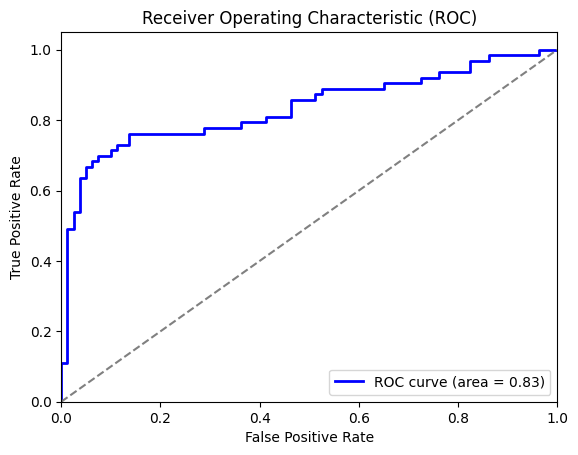

In [ ]:
# Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Mostrar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


A medida que avanza hacia la derecha, la curva se va acercando a la diagonal, lo cual es normal cuando aumentas el umbral de decisión, y el modelo empieza a hacer más falsos positivos.

Un AUC de 0.83 sugiere que el modelo tiene un rendimiento razonablemente bueno para predecir correctamente la clase de los datos. Esto significa que, en general, el modelo hace un buen trabajo separando las clases (en este caso, prediciendo quién sobrevive y quién no, si es el ejemplo del Titanic).

## Conclusión

En este proyecto, hemos desarrollado un modelo de red neuronal para resolver un problema de clasificación binaria utilizando un conjunto de datos (el del Titanic) para predecir si una persona sobrevivió o no basado en sus características. A través de este proceso, hemos seguido una serie de pasos clave que aseguran la efectividad y calidad del modelo:

###Preprocesamiento de datos:

Realizamos un adecuado preprocesamiento, eliminando columnas irrelevantes, gestionando valores nulos y convirtiendo variables categóricas a numéricas. Este paso es crucial para que el modelo entienda los datos y pueda trabajar con ellos de manera eficiente.
La estandarización de las características mediante StandardScaler fue esencial para asegurar que todas las variables estuvieran en la misma escala, lo que mejoró significativamente el rendimiento del modelo.

###Diseño y compilación del modelo:

Implementamos una red neuronal simple pero efectiva, con una capa oculta de 32 neuronas y una capa de salida que utiliza la función de activación sigmoid, ideal para problemas de clasificación binaria.
Usamos el optimizador Adam, conocido por su capacidad de converger rápidamente, junto con la función de pérdida binary crossentropy, adecuada para este tipo de problemas.

###Entrenamiento y evaluación del modelo:

Entrenamos el modelo en 50 epochs, usando un tamaño de batch de 32, lo que permitió un equilibrio entre la rapidez del entrenamiento y la estabilidad de las actualizaciones de pesos.
Evaluamos el modelo usando la precisión (accuracy) y la curva ROC para obtener una visión más completa de su rendimiento.
El modelo mostró una precisión razonable y un AUC de 0.83, lo que indica un buen rendimiento general. La curva ROC mostró que el modelo tiene una buena capacidad para diferenciar entre los que sobreviven y los que no, con pocas predicciones erróneas.

###Curva ROC y AUC:

La curva ROC fue una herramienta crucial para evaluar el equilibrio entre verdaderos positivos y falsos positivos a medida que ajustamos los umbrales de decisión. Un AUC de 0.83 sugiere que el modelo es efectivo, pero también hay margen de mejora.

###Para mejorar el rendimiento del modelo, algunos enfoques adicionales podrían ser:

Experimentar con arquitecturas de red más complejas (añadir más capas o neuronas).
Aumentar el número de epochs o ajustar el tamaño del batch para optimizar la convergencia del modelo.
Recolección y enriquecimiento de datos: Un mayor volumen de datos o características adicionales podrían mejorar el rendimiento del modelo.
Técnicas de regularización como dropout o batch normalization podrían ayudar a evitar el sobreajuste y mejorar la generalización del modelo.

In [ ]:
print("Mario Yahir García Hernández")
print("Oscar Correa Saenz")
print("Ricardo Aguilar Pérez")